In [5]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

sns.set(font_scale=1.3)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [7]:
base_model = ResNet50(
    weights='imagenet', include_top=False, input_shape=(300, 300, 3)
)



In [8]:
img_size = (300, 300)
batch_size = 32
num_classes = 2 # 가위 바위 보
epochs = 15

base_model.trainable = False

model = models.Sequential(
    [
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        # layers.Dropout(0.5),
        layers.Dense(3, activation='softmax') # 3개의 클래스 출력층
    ]
)

# 모델 요약 출력
model.summary()

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

train_datagen = ImageDataGenerator(
    rescale = 1./255, # 정규화
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './data/Rock-Paper-Scissors/train/',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    './data/Rock-Paper-Scissors/test/',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 10, 10, 2048)   │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 204800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   104,858,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,447,363 (489.99 MB)

 Trainable params: 104,859,651 (400.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.4656 - loss: 4.6326 - val_accuracy: 0.7216 - val_loss: 0.6506
Epoch 2/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8125 - loss: 0.5419 - val_accuracy: 0.9000 - val_loss: 0.4704
Epoch 3/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8557 - loss: 0.4257 - val_accuracy: 0.7443 - val_loss: 0.6357
Epoch 4/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9688 - loss: 0.1296 - val_accuracy: 0.8000 - val_loss: 0.5116
Epoch 5/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9305 - loss: 0.2688 - val_accuracy: 0.8352 - val_loss: 0.4533
Epoch 6/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9688 - loss: 0.2017 - val_accuracy: 0.7500 - val_loss: 0.6684
Epoch 7/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9469 - loss: 0.2173 - val_accuracy: 0.8011 - val_loss: 0.4318
Epoch 8/15
78/78 ━━━━━━━━━━━

In [10]:
# 모델 검증
results = model.evaluate(validation_generator)
print("test loss, test acc:", results)

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8932 - loss: 0.3225
test loss, test acc: [0.3170376718044281, 0.897849440574646]


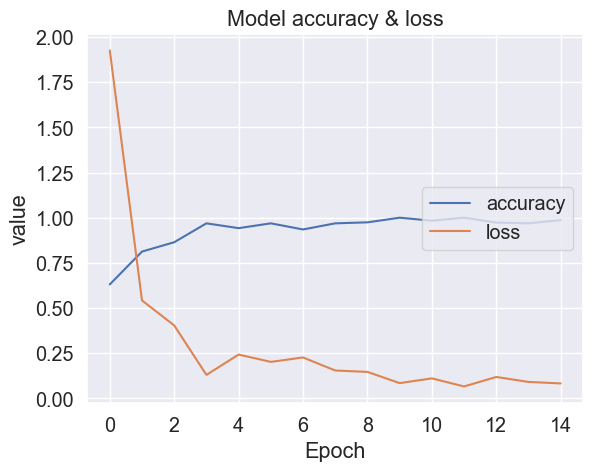

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy & loss')
plt.xlabel('Epoch')
plt.ylabel('value')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [12]:
model.save('model.keras')